# Effects of Environmental and Behavioral Factors on Human Health

#### Oktay Ugurlu and Ahmet Deniz Guner

The project aims to create a model by analyzing the distribution of people's behaviors and external factors and the effects of them on the most common chronic diseases in the cities of the United States. This model purposes to classify the regions by their health situations and predict the percentage of diseases occurring.

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Recently, as we observe with COVID-19, lack of investments about the significant field causes great problems. Of course, a virus is not a predictable factor however, at least some provisions must be made before turning predictable diseases into an enormous problem. Naturally, these should depend on some external and behavioral factors to be predictable. Thus, health investments can be extended to predict forward looking by observing external factors and people's behaviors. At the same, social education can be improved and social opportunities can be extended in favor of analyzing these relations. 

## Data Understanding<a class="anchor" id="data_understanding"></a>

Folium is a visualization tool that we used in our project to make a presentation. We add the necessary data science and machine learning tools for the project.

In [ ]:
pip install folium

In [81]:
import pandas as pd                                          #to import data
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt                              #For visualization
import seaborn as sns; sns.set() 
import folium

from sklearn.preprocessing import MinMaxScaler               #For normalization
from sklearn.cluster import KMeans                           #For cluster model 


from sklearn.model_selection import train_test_split   #Regression evaluation tools
from sklearn.model_selection import cross_val_score   #For evaluation of regression model

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.ensemble import GradientBoostingRegressor   #Regression models 
from sklearn.linear_model import Ridge

import urllib.request
import re
import warnings;
warnings.filterwarnings('ignore');
pd.options.display.max_columns = None           

For the first part of our research, we have used the percentage of occurring COPD (Chronic obstructive pulmonary disease) and asthma disease and usage of cigarette investment data which are obtained from the CDC (Centers for Disease Control and Prevention). We use U.S EPA's daily air pollution measuring data which indicates 272 cities of the US. All datasets belong to the 2017 year.

In [82]:
diseaseAsthma = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Current_asthma_among_adults_aged___18_years.csv")
diseaseCOPD = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Chronic_obstructive_pulmonary_disease_among_adults_aged___18_years.csv")
cigaretePure = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Current_smoking_among_adults_aged___18_years.csv") 
air_cbsa = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/daily_aqi_by_cbsa_2017.csv")

We invest general situation of datasets to predict necessary processes in data preparation step and determine empty columns and "PopulationCount" columns which must be transformed to numeric data.

In [83]:
print("Asthma Data: " +str(diseaseAsthma.shape) )
print(diseaseAsthma.info())
print("COPD Data: " +str(diseaseCOPD.shape))
print(diseaseCOPD.info())
print("Cigarete Data: " +str(cigaretePure.shape))
print(cigaretePure.info())

Asthma Data: (29006, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        29006 non-null  int64  
 1   StateAbbr                   29006 non-null  object 
 2   StateDesc                   29006 non-null  object 
 3   CityName                    29004 non-null  object 
 4   GeographicLevel             29006 non-null  object 
 5   DataSource                  29006 non-null  object 
 6   Category                    29006 non-null  object 
 7   UniqueID                    29006 non-null  object 
 8   Measure                     29006 non-null  object 
 9   Data_Value_Unit             29006 non-null  object 
 10  DataValueTypeID             29006 non-null  object 
 11  Data_Value_Type             29006 non-null  object 
 12  Data_Value                  28212 non-null  float64
 13  Low_Co

We monitor general view of asthma data.

In [84]:
diseaseAsthma.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,IL,Illinois,Decatur,Census Tract,BRFSS,Health Outcomes,1718823-17115001100,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,10.0,9.5,10.5,NaN,NaN,"3,485","(39.8496654386, -88.9073271617)",HLTHOUT,CASTHMA,1718823.0,1.711500e+10,Current Asthma
1,2017,IL,Illinois,Naperville,Census Tract,BRFSS,Health Outcomes,1751622-17043846201,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,8.3,8.0,8.8,NaN,NaN,"5,832","(41.7328221894, -88.1160630821)",HLTHOUT,CASTHMA,1751622.0,1.704385e+10,Current Asthma
2,2017,IL,Illinois,Cicero,City,BRFSS,Health Outcomes,1714351,Current asthma among adults aged >=18 Years,%,AgeAdjPrv,Age-adjusted prevalence,8.4,8.2,8.6,NaN,NaN,"83,891","(41.844539143, -87.7592873023)",HLTHOUT,CASTHMA,1714351.0,NaN,Current Asthma


We monitor the general view of chronic obstructive pulmonary disease data.

In [85]:
diseaseCOPD.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,ID,Idaho,Boise City,Census Tract,BRFSS,Health Outcomes,1608830-16001000804,Chronic obstructive pulmonary disease among ad...,%,CrdPrv,Crude prevalence,4.6,3.9,5.4,NaN,NaN,"5,604","(43.5917744712, -116.180835276)",HLTHOUT,COPD,1608830.0,1.600100e+10,COPD
1,2017,GA,Georgia,Columbus,Census Tract,BRFSS,Health Outcomes,1319000-13215003301,Chronic obstructive pulmonary disease among ad...,%,CrdPrv,Crude prevalence,8.2,7.3,9.1,NaN,NaN,"1,317","(32.4126106139, -84.9308181793)",HLTHOUT,COPD,1319000.0,1.321500e+10,COPD
2,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003007000,Chronic obstructive pulmonary disease among ad...,%,CrdPrv,Crude prevalence,1.9,1.7,2.1,NaN,NaN,"4,041","(21.3445412044, -157.925563289)",HLTHOUT,COPD,15003.0,1.500301e+10,COPD


We monitor the general view of usage of cigarette data.

In [86]:
cigaretePure.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,GA,Georgia,Savannah,Census Tract,BRFSS,Unhealthy Behaviors,1369000-13051011600,Current smoking among adults aged >=18 Years,%,CrdPrv,Crude prevalence,24.1,21.6,26.4,NaN,NaN,"2,307","(32.0899262011, -81.1328507898)",UNHBEH,CSMOKING,1369000.0,1.305101e+10,Current Smoking
1,2017,GA,Georgia,Johns Creek,Census Tract,BRFSS,Unhealthy Behaviors,1342425-13121011426,Current smoking among adults aged >=18 Years,%,CrdPrv,Crude prevalence,13.3,10.8,15.9,NaN,NaN,"1,154","(34.0365607891, -84.2419507191)",UNHBEH,CSMOKING,1342425.0,1.312101e+10,Current Smoking
2,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003008412,Current smoking among adults aged >=18 Years,%,CrdPrv,Crude prevalence,14.3,12.9,15.7,NaN,NaN,"6,543","(21.3403268761, -158.029720453)",UNHBEH,CSMOKING,15003.0,1.500301e+10,Current Smoking


We examine data distribution type and decide to drop "Age-adjusted prevalence" data in data preparation step because of our research is regional.

In [87]:
print(diseaseAsthma["Data_Value_Type"].unique())
print(diseaseCOPD["Data_Value_Type"].unique())
print(cigaretePure["Data_Value_Type"].unique())

['Crude prevalence' 'Age-adjusted prevalence']
['Crude prevalence' 'Age-adjusted prevalence']
['Crude prevalence' 'Age-adjusted prevalence']


We monitor air quality index data, inspect general situation of it, and show the particuls which is used in grading the aqi score.

In [88]:
print(air_cbsa.shape)
air_cbsa.head()

(180116, 8)


,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,"Aberdeen, SD",10100,2017-01-01,25,Good,PM2.5,46-013-0003,1
1,"Aberdeen, SD",10100,2017-01-04,48,Good,PM2.5,46-013-0003,1
2,"Aberdeen, SD",10100,2017-01-07,58,Moderate,PM2.5,46-013-0003,1
3,"Aberdeen, SD",10100,2017-01-10,40,Good,PM2.5,46-013-0003,1
4,"Aberdeen, SD",10100,2017-01-13,29,Good,PM2.5,46-013-0003,1


In [89]:
air_cbsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180116 entries, 0 to 180115
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   CBSA                       180116 non-null  object
 1   CBSA Code                  180116 non-null  int64 
 2   Date                       180116 non-null  object
 3   AQI                        180116 non-null  int64 
 4   Category                   180116 non-null  object
 5   Defining Parameter         180116 non-null  object
 6   Defining Site              180116 non-null  object
 7   Number of Sites Reporting  180116 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 11.0+ MB


In [90]:
air_cbsa["Defining Parameter"].unique()

array(['PM2.5', 'PM10', 'Ozone', 'NO2', 'SO2', 'CO'], dtype=object)

We add the required datasets for the second part of the research. We analyze them to determine necessary process that must be done in data preparation part:

- **alcholl**:          Rates of binge drinking. <br>
- **sleepL7**:          Rates of sleep less than 7 hour in one day. <br>
- **cancer**:           Rates of occuring cancer (skin cancer is excluded) <br>
- **cholesterol**:      Rates of cholesterol patients. <br>
- **heartDisease**:     Rates of occuring hearth disease. <br>
- **obesity**:          Rates of obesity. <br>
- **diabete**:          Rates of occuring diabete disease. <br>
- **noSport**:          Rates of lack of exercise. <br> 
- **visitDoctor**:      Rates of regularly visiting the hospital for check-up. <br>
- **noInsurance**:      Rates of no have health insurance. <br>
- **kidneyDis**:        Rates of kidney disease. <br>
- **mental14**:         Rates of occuring mental ilnesses more than 14 day. <br>
- **highBlood**:        Rates of occuring high blood presure. <br>

In [91]:
alcholl = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Binge_drinking_among_adults_aged___18_years.csv")
sleepL7 = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Sleeping_less_than_7_hours_among_adults_aged___18_years.csv")
mental14 = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Mental_health_not_good_for___14_days_among_adults_aged___18_years.csv")
highBlood = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__High_blood_pressure_among_adults_aged___18_years.csv")
cancer = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Cancer__excluding_skin_cancer__among_adults_aged___18_years.csv")
cholesterol = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Cholesterol_screening_among_adults_aged___18_years.csv")
heartDisease = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Coronary_heart_disease_among_adults_aged___18_years.csv")
obesity = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Obesity_among_adults_aged___18_years.csv")
diabete = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Diagnosed_diabetes_among_adults_aged___18_years.csv")
noSport = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__No_leisure-time_physical_activity_among_adults_aged___18_years.csv")
visitDoctor = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Visits_to_doctor_for_routine_checkup_within_the_past_year_among_adults_aged___18_years.csv")
noInsurance = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Current_lack_of_health_insurance_among_adults_aged_18-64_years.csv")
kidneyDis = pd.read_csv("https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/500_Cities__Chronic_kidney_disease_among_adults_aged___18_years.csv")

In [92]:
dataList = [diseaseAsthma,diseaseCOPD,cigaretePure,alcholl,sleepL7,mental14,highBlood,
         cancer,cholesterol,heartDisease,obesity,diabete,noSport ,visitDoctor,noInsurance,kidneyDis]
for i in dataList:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        29006 non-null  int64  
 1   StateAbbr                   29006 non-null  object 
 2   StateDesc                   29006 non-null  object 
 3   CityName                    29004 non-null  object 
 4   GeographicLevel             29006 non-null  object 
 5   DataSource                  29006 non-null  object 
 6   Category                    29006 non-null  object 
 7   UniqueID                    29006 non-null  object 
 8   Measure                     29006 non-null  object 
 9   Data_Value_Unit             29006 non-null  object 
 10  DataValueTypeID             29006 non-null  object 
 11  Data_Value_Type             29006 non-null  object 
 12  Data_Value                  28212 non-null  float64
 13  Low_Confidence_Limit        282

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        29006 non-null  int64  
 1   StateAbbr                   29006 non-null  object 
 2   StateDesc                   29006 non-null  object 
 3   CityName                    29004 non-null  object 
 4   GeographicLevel             29006 non-null  object 
 5   DataSource                  29006 non-null  object 
 6   Category                    29006 non-null  object 
 7   UniqueID                    29006 non-null  object 
 8   Measure                     29006 non-null  object 
 9   Data_Value_Unit             29006 non-null  object 
 10  DataValueTypeID             29006 non-null  object 
 11  Data_Value_Type             29006 non-null  object 
 12  Data_Value                  28212 non-null  float64
 13  Low_Confidence_Limit      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28973 entries, 0 to 28972
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        28973 non-null  int64  
 1   StateAbbr                   28973 non-null  object 
 2   StateDesc                   28973 non-null  object 
 3   CityName                    28971 non-null  object 
 4   GeographicLevel             28973 non-null  object 
 5   DataSource                  28973 non-null  object 
 6   Category                    28973 non-null  object 
 7   UniqueID                    28973 non-null  object 
 8   Measure                     28973 non-null  object 
 9   Data_Value_Unit             28973 non-null  object 
 10  DataValueTypeID             28973 non-null  object 
 11  Data_Value_Type             28973 non-null  object 
 12  Data_Value                  28211 non-null  float64
 13  Low_Confidence_Limit        282

In [93]:
kidneyDis.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,GA,Georgia,Columbus,Census Tract,BRFSS,Health Outcomes,1319000-13215010502,Chronic kidney disease among adults aged >=18 ...,%,CrdPrv,Crude prevalence,3.5,3.1,3.8,NaN,NaN,"1,406","(32.5146118342, -84.8796632697)",HLTHOUT,KIDNEY,1319000.0,1.321501e+10,Chronic Kidney Disease
1,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003009400,Chronic kidney disease among adults aged >=18 ...,%,CrdPrv,Crude prevalence,3.7,3.5,3.9,NaN,NaN,"5,155","(21.4942478343, -158.038203503)",HLTHOUT,KIDNEY,15003.0,1.500301e+10,Chronic Kidney Disease
2,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003011300,Chronic kidney disease among adults aged >=18 ...,%,CrdPrv,Crude prevalence,3.6,3.5,3.8,NaN,NaN,"5,451","(21.3383298878, -157.731642152)",HLTHOUT,KIDNEY,15003.0,1.500301e+10,Chronic Kidney Disease


In [94]:
sleepL7.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,IL,Illinois,Chicago,Census Tract,BRFSS,Unhealthy Behaviors,1714000-17031840400,Sleeping less than 7 hours among adults aged >...,%,CrdPrv,Crude prevalence,36.5,35.6,37.4,NaN,NaN,"3,326","(41.8338478343, -87.6676795275)",UNHBEH,SLEEP,1714000.0,1.703184e+10,Sleep <7 hours
1,2016,IL,Illinois,Chicago,Census Tract,BRFSS,Unhealthy Behaviors,1714000-17031170800,Sleeping less than 7 hours among adults aged >...,%,CrdPrv,Crude prevalence,32.6,31.3,33.9,NaN,NaN,"3,721","(41.9415761666, -87.8123712763)",UNHBEH,SLEEP,1714000.0,1.703117e+10,Sleep <7 hours
2,2016,IL,Illinois,Chicago,Census Tract,BRFSS,Unhealthy Behaviors,1714000-17031160300,Sleeping less than 7 hours among adults aged >...,%,CrdPrv,Crude prevalence,33.6,32.4,34.9,NaN,NaN,"3,785","(41.9572682221, -87.7308957633)",UNHBEH,SLEEP,1714000.0,1.703116e+10,Sleep <7 hours


## Data Preparation<a class="anchor" id="data_preparation"></a>

We drop some of the columns which are not used on asthma, COPD, and cigarette data tables. After, we drop not "Crude-prevalence" rows and transform the population column into numerical data.

In [95]:
diseaseAsthma =  diseaseAsthma[diseaseAsthma["Data_Value_Type"]=='Crude prevalence']
diseaseCOPD =  diseaseCOPD[diseaseCOPD["Data_Value_Type"]=='Crude prevalence']
cigaretePure =  cigaretePure[cigaretePure["Data_Value_Type"]=='Crude prevalence']
asthma = diseaseAsthma.drop(columns=["GeographicLevel","DataSource","Category","Measure","Data_Value_Unit","DataValueTypeID",
                       "Data_Value_Type","Data_Value_Footnote_Symbol","Data_Value_Footnote",
                    "CategoryID","MeasureId","Short_Question_Text","Year","GeoLocation","UniqueID","CityFIPS","TractFIPS"])
COPD = diseaseCOPD.drop(columns=["GeographicLevel","DataSource","Category","Measure","Data_Value_Unit","DataValueTypeID",
                       "Data_Value_Type","Data_Value_Footnote_Symbol","Data_Value_Footnote",
                    "CategoryID","MeasureId","Short_Question_Text","Year","GeoLocation","UniqueID","CityFIPS","TractFIPS"])
cigarete = cigaretePure.drop(columns=["GeographicLevel","DataSource","Category","Measure","Data_Value_Unit","DataValueTypeID",
                       "Data_Value_Type","Data_Value_Footnote_Symbol","Data_Value_Footnote",
                    "CategoryID","MeasureId","Short_Question_Text","Year","GeoLocation","UniqueID","CityFIPS","TractFIPS"])

Population = []
for i in asthma["PopulationCount"]:
    number = int(i.replace(",",""))
    Population.append(number)
asthma["Population"] = Population
asthma = asthma.drop(columns=["PopulationCount"])
Population = []
for i in COPD["PopulationCount"]:
    number = int(i.replace(",",""))
    Population.append(number)
COPD["Population"] = Population
COPD = COPD.drop(columns=["PopulationCount"])
Population = []
for i in cigarete["PopulationCount"]:
    number = int(i.replace(",",""))
    Population.append(number)
cigarete["Population"] = Population
cigarete = cigarete.drop(columns=["PopulationCount"])

asthma = asthma.dropna()
asthma["Totalpatient"] = (asthma["Data_Value"]*asthma["Population"])/100
COPD = COPD.dropna()
COPD["Totalpatient"] = (COPD["Data_Value"]*COPD["Population"])/100
cigarete = cigarete.dropna()
cigarete["Totalpatient"] = (cigarete["Data_Value"]*cigarete["Population"])/100

500 cities were found as CBSA regions in each row, so we collect them on 500 cities by doing these processes as you can see below. In this way, we made these 3 tables as combinable each other.

In [96]:
StateAbbrList = []
StateDescList = []
CityNameList = []
Data_ValueList = []
PopulationList = []

for state in asthma["StateDesc"].unique():
    cities = asthma[asthma["StateDesc"] == state]
    for cityName in cities["CityName"].unique():
        city = cities[cities["CityName"] == cityName]
        CityNameList.append(cityName)
        StateAbbrList.append(str(city.iloc[0]["StateAbbr"]))
        StateDescList.append(str(city.iloc[0]["StateDesc"]))
        Data_ValueList.append(float(city["Totalpatient"].sum()/city["Population"].sum())*100)
        PopulationList.append(city["Population"].sum())

Data = {"StateAbbr":StateAbbrList,"StateDesc":StateDescList,"CityName":CityNameList,
        "AsthmaData_Value":Data_ValueList,"Population":PopulationList,}
AsthmaData = pd.DataFrame(Data,columns = ["CityName","StateAbbr","StateDesc","Population","AsthmaData_Value",])
AsthmaData.info()

StateAbbrList = []
StateDescList = []
CityNameList = []
Data_ValueList = []

for state in COPD["StateDesc"].unique():
    cities = COPD[COPD["StateDesc"] == state]
    for cityName in cities["CityName"].unique():
        city = cities[cities["CityName"] == cityName]
        CityNameList.append(cityName)
        StateAbbrList.append(city.iloc[0]["StateAbbr"])
        StateDescList.append(city.iloc[0]["StateDesc"])
        Data_ValueList.append(float(city["Totalpatient"].sum()/city["Population"].sum())*100)

Data = {"StateAbbr":StateAbbrList,"StateDesc":StateDescList,"CityName":CityNameList,"COPDData_Value":Data_ValueList,}
COPDData = pd.DataFrame(Data,columns = ["CityName","StateAbbr","StateDesc","COPDData_Value"])
COPDData.info()

StateAbbrList = []
StateDescList = []
CityNameList = []
Data_ValueList = []

for state in cigarete["StateDesc"].unique():
    cities = cigarete[cigarete["StateDesc"] == state]
    for cityName in cities["CityName"].unique():
        city = cities[cities["CityName"] == cityName]
        CityNameList.append(cityName)
        StateAbbrList.append(str(city.iloc[0]["StateAbbr"]))
        StateDescList.append(str(city.iloc[0]["StateDesc"]))
        Data_ValueList.append(float(city["Totalpatient"].sum()/city["Population"].sum())*100)

Data = {"StateAbbr":StateAbbrList,"StateDesc":StateDescList,"CityName":CityNameList,"cigareteData_Value":Data_ValueList}
cigareteData = pd.DataFrame(Data,columns = ["CityName","StateAbbr","StateDesc","cigareteData_Value"])
cigareteData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CityName          500 non-null    object 
 1   StateAbbr         500 non-null    object 
 2   StateDesc         500 non-null    object 
 3   Population        500 non-null    int64  
 4   AsthmaData_Value  500 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CityName        500 non-null    object 
 1   StateAbbr       500 non-null    object 
 2   StateDesc       500 non-null    object 
 3   COPDData_Value  500 non-null    float64
dtypes: float64(1), object(3)
memory usage: 15.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data 

We properly join these three datasets and monitor the relationships between them.

In [97]:
asth = AsthmaData.sort_values(by=["StateDesc","CityName"])
asth = asth.set_index(pd.Index(range(0, 500)))
copd = COPDData.sort_values(by=["StateDesc","CityName"])
copd = copd.set_index(pd.Index(range(0, 500)))
copd = copd.drop(columns=["CityName","StateAbbr","StateDesc"])
smke = cigareteData.sort_values(by=["StateDesc","CityName"])
smke = smke.set_index(pd.Index(range(0, 500)))
smke = smke.drop(columns=["CityName","StateAbbr","StateDesc"])
df = asth
df = df.join(copd)
df = df.join(smke)
df.head()

,CityName,StateAbbr,StateDesc,Population,AsthmaData_Value,COPDData_Value,cigareteData_Value
0,Birmingham,AL,Alabama,424281,12.251924,9.358865,21.913410
1,Hoover,AL,Alabama,163211,9.195986,5.585067,13.398634
2,Huntsville,AL,Alabama,360110,10.897801,8.037243,18.449661
3,Mobile,AL,Alabama,390156,11.552697,8.864758,20.622448
4,Montgomery,AL,Alabama,411497,11.518448,8.643537,21.289517


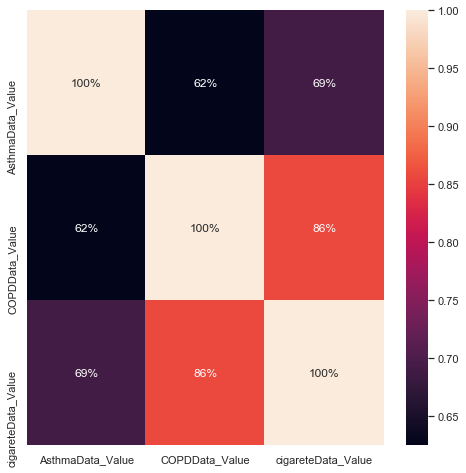

In [98]:
plt.figure(figsize=(8,8))
sns.heatmap(df[["AsthmaData_Value","COPDData_Value","cigareteData_Value"]].corr(), annot=True, fmt='.0%')

We calculate annual mean according to cities because of the air quality index data are daily measured.

In [99]:
CBSAList = []
AQIList = []
counter = 0
for i in air_cbsa["CBSA"].unique():
    city = air_cbsa[air_cbsa["CBSA"] == i]
    CBSAList.append(str(city.iloc[0]["CBSA"]).strip())
    AQIList.append(city["AQI"].mean())
Data = {"CBSA":CBSAList,"AQI":AQIList}
df_AQI = pd.DataFrame(Data,columns = ["CBSA","AQI"])
print(df_AQI.info())
df_AQI.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CBSA    536 non-null    object 
 1   AQI     536 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.5+ KB
None


,CBSA,AQI
0,"Aberdeen, SD",24.663934
1,"Aberdeen, WA",24.841096
2,"Adjuntas, PR",30.595745
3,"Adrian, MI",40.409341
4,"Akron, OH",42.383562


While combining asthma, COPD, and cigarette usage data, we used regular expression. Because of this, we get the data from different sources, some city names are not matched. Thus, we create a new data table which includes 272 rows by determining and combining the mismatched of them. After that, we monitor correlations between them.

In [100]:
df_AQI_copy = df_AQI[:]
df_AQI_copy.loc[:,'State'] = df_AQI_copy.loc[:,'CBSA'].apply(lambda x: x.split(',')[1]) 
df_AQI_copy.loc[:,'City'] = df_AQI_copy.loc[:,'CBSA'].apply(lambda x: x.split(',')[0])
del df_AQI_copy['CBSA']

a_copy = df[:]
join_air =  pd.DataFrame(columns=["AQI","State","City"])
df_index=0
is_found = False

control = 0

a_copy = a_copy[['CityName','StateAbbr','AsthmaData_Value','COPDData_Value','cigareteData_Value']]
join_a = pd.DataFrame(columns=['CityName','StateAbbr','AsthmaData_Value','COPDData_Value','cigareteData_Value'])
join_a_index = 0
for i in range(0, a_copy['CityName'].count()):
    for j in range(0, df_AQI_copy['City'].count()):
        splitted_city = re.findall(r"[\w']+[\s\w']*", df_AQI_copy.loc[j,'City'])
        splitted_state = re.findall(r"[\w']+[\s\w']*", df_AQI_copy.loc[j,'State'])
        if(a_copy.loc[i, 'StateAbbr'] in splitted_state and a_copy.loc[i, 'CityName'] in splitted_city):
            join_air = join_air.append(df_AQI_copy.loc[j], ignore_index = True)  
            
            join_air.loc[df_index, 'City'] = a_copy.loc[i,'CityName']
            join_air.loc[df_index,'State'] = a_copy.loc[i,'StateAbbr']
            df_index+=1
            is_found = True
            control=control+1
            #print(splitted_city,splitted_state)
            
    if(control>1):
        print('-------------------Error-----------')
        
    if(is_found):
        join_a = join_a.append(a_copy.loc[i], ignore_index = True)
        join_a_index+=1
    control = 0    
    is_found = False

df_withAir = join_a[:]
join_air = join_air.set_index(pd.Index(range(0, 272)))
df_withAir = df_withAir.join(join_air)
pd.options.display.max_rows = 10


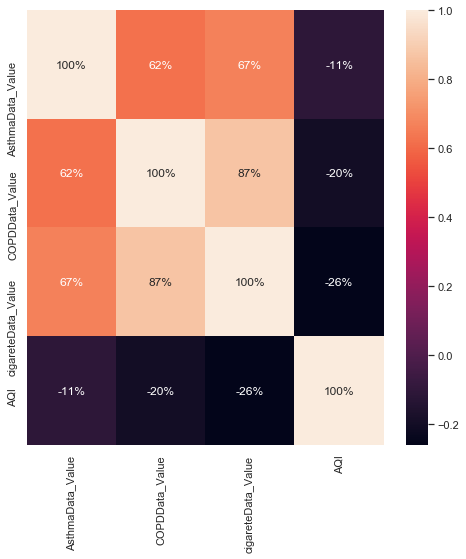

In [101]:
plt.figure(figsize=(8,8))
sns.heatmap(df_withAir.corr(), annot=True, fmt='.0%')

<img src="https://www.epa.gov/sites/production/files/styles/large/public/2019-07/aqitableforcourse.png" style="height:560px">

We compare air pollution data and respiratory disease by using heatmap but we can't find the correlation which we expected. After, we decide on the reason for this. In above table shows the air quality scale according to AQIs (Air quality Index) and below bar chart shows the rates of the 2017 year AQI values for every 532 cities of the US. When we observe these 2 plot and table, almost all cities have good air quality values expect just 2 of them. Thus, we can't use AQI values as a factor of occurring respiratory disease in the cities of the US.

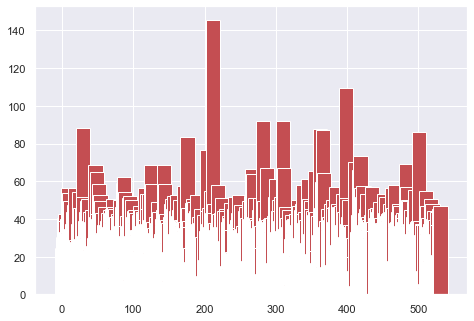

In [102]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
aqivalues = df_AQI["AQI"][0:532]
ax.bar(range(0,532),aqivalues,width=20,color = 'r')
plt.show()

We combine all of the datasets before following the same steps as previous cigarette usage, asthma, and COPD data preprocessing operations because of these datasets are in the same format in the second part of the project.

In [103]:
asthma = diseaseAsthma[:]
COPD = diseaseCOPD[:]
cigarete = cigaretePure[:]

In [104]:
dataList = [asthma,COPD,cigarete,alcholl,sleepL7,mental14,highBlood,
         cancer,cholesterol,heartDisease,obesity,diabete,noSport ,visitDoctor,noInsurance,kidneyDis]
counter = 0
for i in dataList:
    dataList[counter] = i.drop(columns=["GeographicLevel","DataSource","Category","Measure","Data_Value_Unit",
                                         "DataValueTypeID","Data_Value_Footnote_Symbol","Data_Value_Footnote",
                    "CategoryID","MeasureId","Short_Question_Text","Year","GeoLocation","CityFIPS","TractFIPS"])
    dataList[counter] = dataList[counter].dropna()
    counter = counter + 1
counter = 0
for i in dataList:
    i = i[i["Data_Value_Type"]  == "Crude prevalence" ]
    dataList[counter] = i.sort_values(by=["StateDesc","CityName","UniqueID"])
    dataList[counter] = dataList[counter].set_index(pd.Index(range(0, len(i))))
    print(dataList[counter].info())
    counter = counter + 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27710 entries, 0 to 27709
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StateAbbr              27710 non-null  object 
 1   StateDesc              27710 non-null  object 
 2   CityName               27710 non-null  object 
 3   UniqueID               27710 non-null  object 
 4   Data_Value_Type        27710 non-null  object 
 5   Data_Value             27710 non-null  float64
 6   Low_Confidence_Limit   27710 non-null  float64
 7   High_Confidence_Limit  27710 non-null  float64
 8   PopulationCount        27710 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27710 entries, 0 to 27709
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StateAbbr              27710 non-null  object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27710 entries, 0 to 27709
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StateAbbr              27710 non-null  object 
 1   StateDesc              27710 non-null  object 
 2   CityName               27710 non-null  object 
 3   UniqueID               27710 non-null  object 
 4   Data_Value_Type        27710 non-null  object 
 5   Data_Value             27710 non-null  float64
 6   Low_Confidence_Limit   27710 non-null  float64
 7   High_Confidence_Limit  27710 non-null  float64
 8   PopulationCount        27710 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27710 entries, 0 to 27709
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StateAbbr              27710 non-null  object 

In [105]:
dataListName = ["asthma","COPD","cigarete","alcholl","sleepL7","mental14","highBlood",
                "cancer","cholesterol","heartDisease","obesity","diabete","noSport",
                "visitDoctor","noInsurance","kidneyDis"]
df_joined_all = pd.DataFrame()
counter = 0
for i in dataList:
    a = i
    if(counter == 0):
        df_joined_all["StateDesc"] = a["StateDesc"]   
        df_joined_all["StateAbbr"] = a["StateAbbr"]
        df_joined_all["CityName"] = a["CityName"]
        df_joined_all["UniqueID"] = a["UniqueID"]
        df_joined_all["PopulationCount"] = a["PopulationCount"]
    df_joined_all[dataListName[counter]] = a["Data_Value"]
    counter = counter + 1
Population = []
for i in df_joined_all["PopulationCount"]:
    number = int(i.replace(",",""))
    Population.append(number)
df_joined_all["Population"] = Population
df_joined_all = df_joined_all.drop(columns=["PopulationCount"])
df_joined_all=df_joined_all.fillna(df_joined_all.mean())
for i in dataListName:
    df_joined_all[i+"Totalpatient"] = (df_joined_all[i]*df_joined_all["Population"])/100
df_joined_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27710 entries, 0 to 27709
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   StateDesc                 27710 non-null  object 
 1   StateAbbr                 27710 non-null  object 
 2   CityName                  27710 non-null  object 
 3   UniqueID                  27710 non-null  object 
 4   asthma                    27710 non-null  float64
 5   COPD                      27710 non-null  float64
 6   cigarete                  27710 non-null  float64
 7   alcholl                   27710 non-null  float64
 8   sleepL7                   27710 non-null  float64
 9   mental14                  27710 non-null  float64
 10  highBlood                 27710 non-null  float64
 11  cancer                    27710 non-null  float64
 12  cholesterol               27710 non-null  float64
 13  heartDisease              27710 non-null  float64
 14  obesit

In [106]:
StateAbbrList = []
StateDescList = []
CityNameList = []
PopulationList = []
asthmaList = []          
COPDList = []            
cigareteList = []          
alchollList  = []             
sleepL7List  = []                      
mental14List = []             
highBloodList  = []           
cancerList  = []              
cholesterolList  = []         
heartDiseaseList  = []       
obesityList  = []            
diabeteList  = []             
noSportList  = []           
visitDoctorList = []
noInsuranceList = []
kidneyDisList = []
dataList = [asthmaList,COPDList,cigareteList,alchollList,sleepL7List,mental14List
            , highBloodList,cancerList,cholesterolList,heartDiseaseList,obesityList,
            diabeteList,noSportList, visitDoctorList,noInsuranceList,kidneyDisList ]

for state in df_joined_all["StateDesc"].unique():
    cities = df_joined_all[df_joined_all["StateDesc"] == state]
    for cityName in cities["CityName"].unique():
        city = cities[cities["CityName"] == cityName]
        CityNameList.append(cityName)
        StateAbbrList.append(str(city.iloc[0]["StateAbbr"]))
        StateDescList.append(str(city.iloc[0]["StateDesc"]))
        PopulationList.append(city["Population"].sum())
        counter = 0
        for i in dataListName:
            dataList[counter].append((float(city[i+"Totalpatient"].sum())/city["Population"].sum())*100)
            counter = counter + 1

Data={"StateAbbr":StateAbbrList,"StateDesc":StateDescList,"CityName":CityNameList,"Population":PopulationList,
      "Asthma":asthmaList,"COPD":COPDList,"Cigarete":cigareteList,"Alchol":alchollList,"SleepL7":sleepL7List,
      "Mental14":mental14List, "HighBlood":highBloodList,
      "Cancer":cancerList,"Cholesterol":cholesterolList,"HeartDissease":heartDiseaseList,"Obesity":obesityList,
            "diabete":diabeteList,"NoSport":noSportList 
     ,"visitDoctor":visitDoctorList,"noInsurance":noInsuranceList,"kidneyDis":kidneyDisList}
dataFrame = pd.DataFrame(Data,columns = ["CityName","StateAbbr","StateDesc","Population","Asthma","COPD","Cigarete"
                                        ,"Mental14","HighBlood","Cancer","Cholesterol","SleepL7"
                                        ,"HeartDissease","Obesity","diabete","NoSport" ,"Alchol"
                                        ,"visitDoctor","noInsurance","kidneyDis"])
print(dataFrame.shape)
dataFrame.head()

(500, 20)


,CityName,StateAbbr,StateDesc,Population,Asthma,COPD,Cigarete,Mental14,HighBlood,Cancer,Cholesterol,SleepL7,HeartDissease,Obesity,diabete,NoSport,Alchol,visitDoctor,noInsurance,kidneyDis
0,Birmingham,AL,Alabama,424281,12.251924,9.358865,21.913410,17.054237,45.149858,5.788859,80.246343,41.637749,7.344296,41.428373,16.404284,38.021691,11.507169,75.012208,20.402446,4.036822
1,Hoover,AL,Alabama,163211,9.195986,5.585067,13.398634,11.511606,32.354112,6.681759,83.801293,32.939775,4.879805,28.794244,8.385036,24.206724,15.418704,70.969521,11.429005,2.411423
2,Huntsville,AL,Alabama,360110,10.897801,8.037243,18.449661,15.103910,37.464467,6.719593,80.173372,37.852859,6.710224,35.569746,11.837562,30.629780,13.259110,71.036000,16.242265,3.204822
3,Mobile,AL,Alabama,390156,11.552697,8.864758,20.622448,16.290866,42.319414,6.483953,80.268228,39.240658,7.625380,37.683122,14.265291,35.949839,13.539715,74.669150,18.190540,3.708303
4,Montgomery,AL,Alabama,411497,11.518448,8.643537,21.289517,16.058256,41.281709,6.058589,80.157590,38.062279,6.888911,38.530762,14.244569,34.895713,13.173401,75.019849,19.055281,3.527362


After monitoring the correlations of the fields, we decide drop some features which have less correlation ratio with diseases than the others. Thus, fields about no health insurance, visiting doctor, cholesterol disease and cancer are dropped from dataframe.

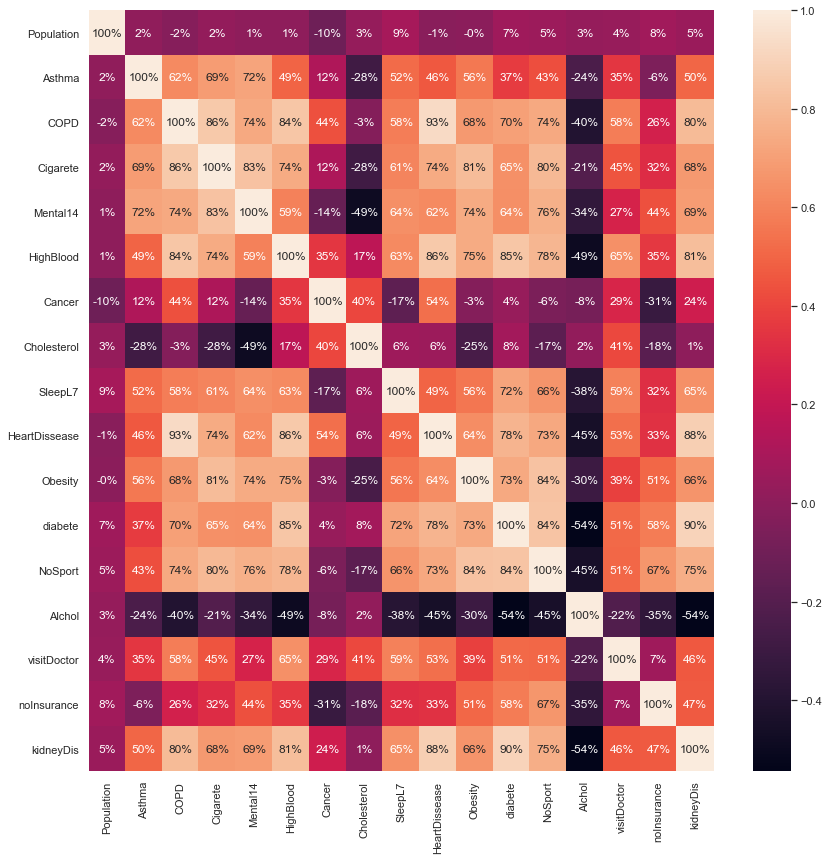

In [107]:
plt.figure(figsize=(14,14))
sns.heatmap(dataFrame.corr(), annot=True, fmt='.0%')

del dataFrame['noInsurance']
del dataFrame['visitDoctor']
del dataFrame['Cancer']
del dataFrame['Cholesterol']

We normalize the dataset with min-max scaler to scale the data values in a shorter range to see more fitting centers in our clustering model. 

In [108]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=False)
min_max_scaler = MinMaxScaler() 

scaled = min_max_scaler.fit_transform(dataFrame[["Asthma","COPD","Cigarete","Mental14",
                                                 "HighBlood", "SleepL7"
                                                ,"HeartDissease","Obesity","diabete","NoSport" ,"Alchol"
                                                ,"kidneyDis"]])  
normalized_data = pd.DataFrame(scaled, columns=dataFrame[["Asthma","COPD","Cigarete","Mental14",
                                                 "HighBlood", "SleepL7"
                                                ,"HeartDissease","Obesity","diabete","NoSport" ,"Alchol"
                                                ,"kidneyDis"]].columns) 

## Modeling<a class="anchor" id="modeling"></a>

### 1) Clustering

In this part, we apply K-means clustering model to indetify unhealthy behaviours which cause diseases. For this, we selected these behaviors from our dataset.

In [109]:
data_clustering = normalized_data[['Cigarete','Mental14','SleepL7','NoSport']]

As we can see below, our best number of cluster is 2 with applying elbow method. According to elbow method, we actually should choose where the line seem as a elbow.

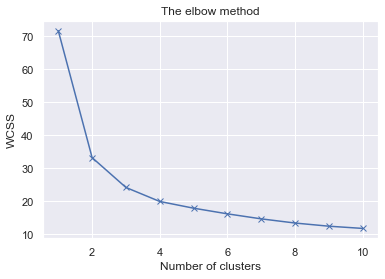

In [110]:
list_column = list(data_clustering.columns)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_clustering[list_column])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

After applying clustering model, the model pick 2 different center for clusters and group the data according to these centers. We chose 'NoSport' and 'Cigarete' columns to observe the clusters and centers of groups.

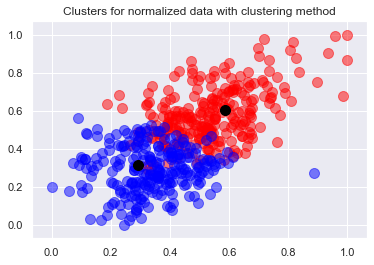

In [111]:
model = KMeans(n_clusters=2)
y = model.fit(data_clustering[list_column])
new_labels = model.predict(data_clustering) 
data_clustering['Cluster'] = new_labels 

plt.scatter(data_clustering[new_labels == 0]['SleepL7'], data_clustering[new_labels == 0]['Cigarete'], s = 100, c = 'red', label = 'malignant', alpha=0.5)
plt.scatter(data_clustering[new_labels == 1]['SleepL7'], data_clustering[new_labels == 1]['Cigarete'], s = 100, c = 'blue', label = 'belign', alpha=0.5)

plt.title("Clusters for normalized data with clustering method")

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], s = 100, c = 'black', label = 'Centroids')

### 2) Regression

In this part, we tried to predict the ratio of occuring some diseases in the cities of US according to 4 main behaviors and some other diseases and find the best algorithm to make realize that. We chose the regression model as supervised learning because our predictand is the type of ratio and depends on behaviors' and diseases' data. 

#### 2.1) Prediction of COPD:

Firstly, we will predict ratio of occuring COPD. Usage of alchol and cigarette, occuring mental ilnesses and lacks of exercise are selected as prector because of the high correlations between occuring COPD and them as we observed in heat maps graphic of fields in dataframe. 

In [112]:
X = dataFrame[['Alchol','Cigarete','Mental14','NoSport']]  # predictor
y = dataFrame[['COPD']]                                    # predictand

We splitted testing and training data to prevent the overfitting of the model.

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

We analyze the **SVR**, **Gradient Boosting**,**Ridge** and **Linear Regression** models to find the best algorithm for our project. We trained and tested the models and took mean-squared errors of predictions. If the result closes to zero, it implies that errors of the model are small and that's we look for the selection of the best model. Because we used cross-validation to look mean square error, we also select 5 for the "cv" parameter which is the number of partitioning for test and train.

In [114]:
gradient_regression = GradientBoostingRegressor()
linear_regression = LinearRegression()
svr_regression = SVR(kernel='linear')
ridge_regression = Ridge()
    
def selection_model(X, y):
    # Perform CV to evaluate mean-squared error of Linear Regression, SVR Regression and Gradient Regression
    mean_squared_error = cross_val_score(linear_regression, X, y, scoring='neg_mean_squared_error',cv=5) 
    print('Mean-squared error of Linear Regression with:', mean_squared_error.mean())

    mean_squared_error = cross_val_score(gradient_regression, X, y, scoring='neg_mean_squared_error',cv=5) 
    print("Mean-squared error of Gradient Regression:", mean_squared_error.mean()) 

    mean_squared_error = cross_val_score(svr_regression, X, y, scoring='neg_mean_squared_error',cv=5) 
    print("Mean-squared error of SVR Regression:", mean_squared_error.mean()) 

    mean_squared_error = cross_val_score(ridge_regression, X, y, scoring='neg_mean_squared_error',cv=5) 
    print("Mean-squared error of Ridge Regression:", mean_squared_error.mean()) 

selection_model(X, y)

Mean-squared error of Linear Regression with: -0.7512819023107132
Mean-squared error of Gradient Regression: -0.8601383423648856
Mean-squared error of SVR Regression: -0.7772964931474505
Mean-squared error of Ridge Regression: -0.7513352578451125


We can observe the accuracy of the models also as you can see below.

In [115]:
def score_of_models(X_train, y_train, X_test, y_test):
    gradient_regression.fit(X_train, y_train)
    linear_regression.fit(X_train,y_train) 
    svr_regression.fit(X_train, y_train) 
    ridge_regression.fit(X_train, y_train)

    score = gradient_regression.score(X_test, y_test)
    print("Score of Gradient Regression: ", score)
    score = linear_regression.score(X_test, y_test)
    print("Score of Linear Regression: ", score)
    score = svr_regression.score(X_test, y_test)
    print("Score of SVR Regression: ", score) 
    score = ridge_regression.score(X_test, y_test)
    print("Score of Ridge Regression: ", score) 

score_of_models(X_train, y_train, X_test, y_test)

Score of Gradient Regression:  0.8028896048001346
Score of Linear Regression:  0.8095908317404179
Score of SVR Regression:  0.7950336668852998
Score of Ridge Regression:  0.8095251202485049


According to mean-squared error and accuracy scores of the models, **Linear Regression** model seems the best one for the prediction which accuracy is equal to 80%.

#### 2.2) Prediction of Hearth Disease:

We select these fields as cause of increasing the hearth disease ratio:
- Ratio of the usage of cigarette and alcohol
- Ratio of occuring high blood and obesity
- Ratio of lack of exercise
- Ratio of occuring mental health


In [116]:
X = dataFrame[['Alchol','Cigarete','Mental14','NoSport', 'Obesity', 'HighBlood']]  # predictor
y = dataFrame[['HeartDissease']]                                                   # predictand

As we have done before we will split our predictors and predictands and try all models to select the best one for prediction of hearth disease and look the accuracy and mean-squared errors.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

In [118]:
selection_model(X, y)

Mean-squared error of Linear Regression with: -0.41867867114728086
Mean-squared error of Gradient Regression: -0.3752083715066806
Mean-squared error of SVR Regression: -0.40873121676647983
Mean-squared error of Ridge Regression: -0.4185728572674597


We observed the accuracy for the same regression models as previos part.

In [119]:
score_of_models(X_train, y_train, X_test, y_test)

Score of Gradient Regression:  0.817078980574212
Score of Linear Regression:  0.8248849233710368
Score of SVR Regression:  0.8168858656386291
Score of Ridge Regression:  0.824870208920087


After look at the accuracies, we can say that **Linear Regression** gives best result which equals to 82% accuracy.

#### 2.3) Prediction of Diabetes:

We select these fields as cause of increasing the diabetes ratio:
- Ratio of the usage of cigarette and alcohol
- Ratio of occuring obesity
- Ratio of lack of exercise
- Ratio of occuring mental health

In [120]:
X = dataFrame[['Alchol','Cigarete','Mental14','NoSport', 'Obesity']]  # predictor
y = dataFrame[['diabete']]                                            # predictand

We will split our predictors and predictands and try all models to select the best one for prediction of hearth disease and look the accuracy and mean-squared errors.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

In [122]:
selection_model(X, y)

Mean-squared error of Linear Regression with: -1.9945128938484153
Mean-squared error of Gradient Regression: -1.8848062005857813
Mean-squared error of SVR Regression: -2.069040319100029
Mean-squared error of Ridge Regression: -1.9941941325987798


We observed the accuracy for the same regression models as previos part.

In [123]:
score_of_models(X_train, y_train, X_test, y_test)

Score of Gradient Regression:  0.8332980977594455
Score of Linear Regression:  0.7813545311578307
Score of SVR Regression:  0.769413891666743
Score of Ridge Regression:  0.7813505148736501


After look at the accuracies, we can say that **Gradient Regression** which equals to 83% accuracy and mean-square error is the most close to 0.

#### 2.4) Prediction of Kidney Disease:

We select these fields as cause of increasing the kidney disease ratio:
- Ratio of the usage of cigarette and alcohol
- Ratio of occuring diabete
- Ratio of lack of exercise
- Ratio of occuring mental health

In [124]:
X = dataFrame[['Alchol','Cigarete','Mental14','NoSport', 'diabete']]  # predictor
y = dataFrame[['kidneyDis']]                                          # predictand

We will split our predictors and predictands and try all models to select the best one for prediction of hearth disease and look the accuracy and mean-squared errors.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

In [126]:
selection_model(X, y)

Mean-squared error of Linear Regression with: -0.04056406231652868
Mean-squared error of Gradient Regression: -0.050585134922439476
Mean-squared error of SVR Regression: -0.0395296138938646
Mean-squared error of Ridge Regression: -0.040568385530645325


We observed the accuracy for the same regression models.

In [127]:
score_of_models(X_train, y_train, X_test, y_test)

Score of Gradient Regression:  0.8583309726689949
Score of Linear Regression:  0.8788256656679895
Score of SVR Regression:  0.879188398794103
Score of Ridge Regression:  0.8788741319670825


After look at the accuracies and mean-squared error, we can say that **SVR Regression** gives best result which equals to 87% accuracy.

## Evaluation<a class="anchor" id="evaluation"></a>

### 1) Clustering Model

The model classified the rates of behaviors as healthy and unhealthy as we can see means of COPD, asthma, diabet, hearth disease, kidney disease and obesity rates for two different clusters.

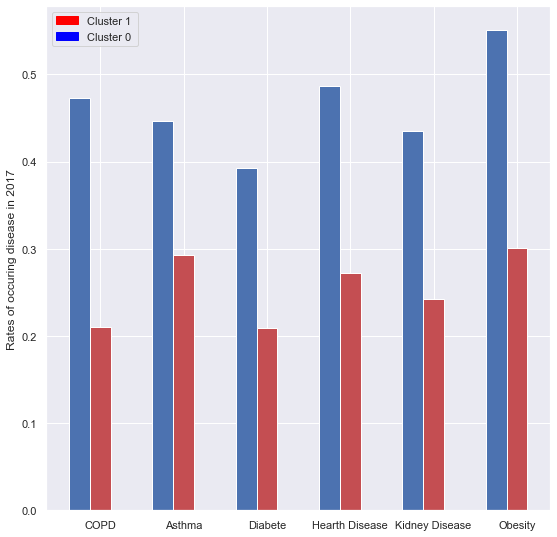

In [128]:
data_with_clusters = normalized_data[:]
data_with_clusters.loc[:,'Cluster'] = data_clustering.loc[:,'Cluster']
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0,0,1,1])
langs = ['COPD', 'Asthma', 'Diabete', 'Hearth Disease', 'Kidney Disease', 'Obesity']

rates_zero = [ data_with_clusters[data_with_clusters['Cluster']==0]['COPD'].mean(),
         data_with_clusters[data_with_clusters['Cluster']==0]['Asthma'].mean(),
         data_with_clusters[data_with_clusters['Cluster']==0]['diabete'].mean(),
         data_with_clusters[data_with_clusters['Cluster']==0]['HeartDissease'].mean(),
         data_with_clusters[data_with_clusters['Cluster']==0]['kidneyDis'].mean(),
         data_with_clusters[data_with_clusters['Cluster']==0]['Obesity'].mean()
            ]

rates_one = [ data_with_clusters[data_with_clusters['Cluster']==1]['COPD'].mean(),
         data_with_clusters[data_with_clusters['Cluster']==1]['Asthma'].mean(),
         data_with_clusters[data_with_clusters['Cluster']==1]['diabete'].mean(),
         data_with_clusters[data_with_clusters['Cluster']==1]['HeartDissease'].mean(),
         data_with_clusters[data_with_clusters['Cluster']==1]['kidneyDis'].mean(),
         data_with_clusters[data_with_clusters['Cluster']==1]['Obesity'].mean()
            ]
barWidth = 0.25

r1 = np.arange(6)
r2 = [x + barWidth for x in r1] 

plt.bar(r1,rates_zero,color='b', width=barWidth )
plt.bar(r2,rates_one,color='r', width=barWidth )
  
plt.ylabel('Rates of occuring disease in 2017')
  
colors = {'Cluster 1 ':'red', 'Cluster 0 ':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xticks([r + barWidth for r in range(0,6)], langs)

plt.show()


We can observe the distrubition of the clusters on each state below US map. According to bar plot and map , west region is more healthy than east region of US.

In [130]:
data_with_clusters[['State','StateDesc','City']] = dataFrame[['StateAbbr','StateDesc','CityName']]

max = data_with_clusters.groupby('State').max()
data_with_clusters.loc[:, 'Mean of Clusters'] = max
data_with_clusters.loc[:, 'Mean of Clusters'] = data_with_clusters['Mean of Clusters'].apply(lambda x: 1 if(x>0.5) else 0)

urllib.request.urlretrieve('https://raw.github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project/master/us-states.json'
                           ,filename='./us-states.json')
my_USA_map = './us-states.json'

_map_ = folium.Map(location=[40.7129, -100], zoom_start=3)

_map_.choropleth(geo_data=my_USA_map, data=data_with_clusters,
            columns=['State','Cluster'],
            key_on='feature.id', fill_color='Reds', fill_opacity=0.7, line_opacity=0.2,
           legend_name='Unhealthy-healthy Behaviour (0: Cluster 0, 1: Cluster 1)')


_map_

### 2) Regression Model

We predicted 4 different diseases according to other diseases and behaviors. We used linear regression for the prediction ratio of COPD because its mean square and accuracy score has the best values of COPD. Its R^2 score equals 0.8095 which is close to 1.0. This is what we looking for in a model. As we can see from the model, COPD disease has a strong connection with the usage of alcohol and cigarette, having mental illnesses, and lack of exercise. These help us to predict the real ratio of occurring COPD disease and the government can use these predictions to prevent the negative results. We can observe the regression line of the model below according to two 4 different independent values.<br><br>

When we look at the regression plot, we can see that COPD disease is more dependent on smoking cigarettes than other factors.

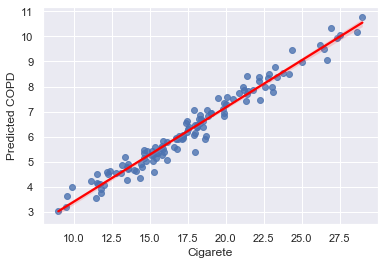

In [131]:
X = dataFrame[['Alchol','Cigarete','Mental14','NoSport']]  # predictor
y = dataFrame[['COPD']]                                    # predictand
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
 
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predicted = linear_regression.predict(X_test)[:,0]
df = pd.DataFrame({'Alchol': X_test['Alchol'], 'Cigarete': X_test['Cigarete'],
                   'Mental14': X_test['Mental14'], 'Mental14': X_test['Mental14'],
                   'NoSport': X_test['NoSport'], 'Predicted COPD': predicted})

sns.regplot(x='Cigarete', y='Predicted COPD',data = df, line_kws={"color": "red"})

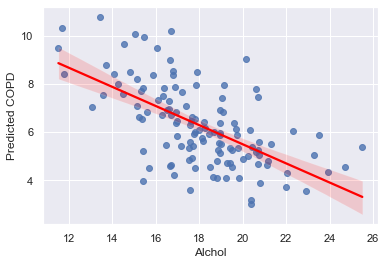

In [132]:
sns.regplot(x='Alchol', y='Predicted COPD',data = df, line_kws={"color": "red"} )

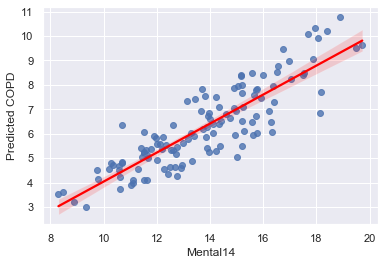

In [133]:
sns.regplot(x='Mental14', y='Predicted COPD',data = df, line_kws={"color": "red"} )

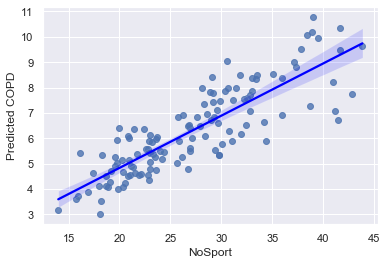

In [134]:
sns.regplot(x='NoSport', y='Predicted COPD',data = df, line_kws={"color": "blue"} ) 

We can also observe the predictions and the real values from below table for each cities which placed in testing dataset. As you can see, our model predict the ratios of occuring the COPD disease almost close to right one.

In [135]:
df['Predicted COPD'] = predicted
df = df['Predicted COPD'] 
df = pd.DataFrame(df, index = df.index) 
df_joined = df.join(dataFrame)

df_joined

,Predicted COPD,CityName,StateAbbr,StateDesc,Population,Asthma,COPD,Cigarete,Mental14,HighBlood,SleepL7,HeartDissease,Obesity,diabete,NoSport,Alchol,kidneyDis
90,5.273659,Ontario,CA,California,327819,8.821923,4.812080,15.118612,14.218559,25.272866,39.137124,4.300631,31.157268,10.430873,26.102004,18.869158,2.817605
254,4.799622,Olathe,KS,Kansas,251744,8.701950,4.488814,14.466386,10.261003,24.136677,27.579168,3.865378,28.483364,7.192023,23.046523,21.153167,2.083072
283,10.774371,Detroit,MI,Michigan,1427494,14.309682,10.683485,28.985116,18.870271,46.826575,49.844963,8.872514,44.536030,18.282348,39.005748,13.419835,4.802950
445,4.785065,Pearland,TX,Texas,182504,7.796998,3.858710,13.481221,10.698113,28.263847,32.319527,3.796749,30.006640,8.576027,26.775707,18.796213,2.198599
461,3.989686,Sandy,UT,Utah,174866,9.205426,4.072638,9.900876,11.114193,24.170959,29.097066,4.119664,24.786549,6.867022,19.866139,15.415083,2.399808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,5.912159,Irving,TX,Texas,432577,8.440722,4.946600,16.713576,13.383510,27.921182,33.745600,4.465715,30.269623,9.871674,31.009345,18.444676,2.533726
49,6.125490,El Cajon,CA,California,198956,9.923978,7.015732,17.976396,15.259752,30.216545,35.359669,5.700938,26.958180,10.103961,22.968705,19.673518,3.274178
134,4.085127,Tustin,CA,California,151005,8.015455,4.003775,11.965162,11.522903,24.146781,33.037241,3.797140,20.546537,8.304340,18.880834,19.813974,2.480463
365,10.194459,Cleveland,OH,Ohio,793629,11.863652,10.844878,28.601168,18.406523,39.709162,42.625730,8.620047,41.171986,17.047964,38.913269,16.705458,4.229517


For heart disease, we use Linear Regression whose R^2 score is equal to 82%. The occuring of heart disease highly depends on the increase of occuring high blood pressure disease, mental ilnesses, obesity, usage of cigarette, lack of exercise, and usage of alcohol. You can see the regression plots for 6 independent variable and dependent variable which is prediction value.

When we look at the regression plot, we can see that the heart disease is more dependent high blood pressure disease than other factors.

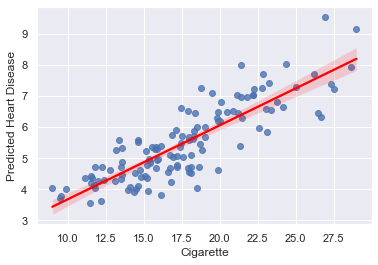

In [136]:
X = dataFrame[['Alchol','Cigarete','Mental14','NoSport','Obesity','HighBlood']] # predictor
y = dataFrame[['HeartDissease']]                                                # predictand
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
 
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predicted = linear_regression.predict(X_test)[:,0]
df = pd.DataFrame({'Alchol': X_test['Alchol'], 'Cigarette': X_test['Cigarete'],
                   'Mental Ilnesses': X_test['Mental14'], 'HighBlood': X_test['HighBlood'],
                   'NoSport': X_test['NoSport'], 'Predicted Heart Disease': predicted, 'Obesity': X_test['Obesity']})

sns.regplot(x='Cigarette', y='Predicted Heart Disease',data = df, line_kws={"color": "red"})

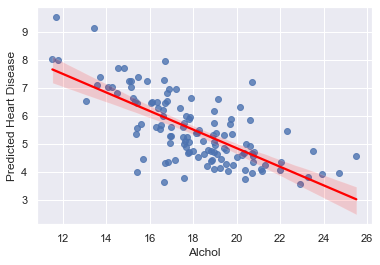

In [137]:
sns.regplot(x='Alchol', y='Predicted Heart Disease',data = df, line_kws={"color": "red"})

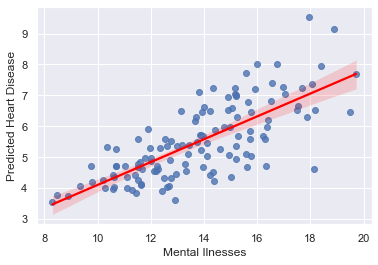

In [138]:
sns.regplot(x='Mental Ilnesses', y='Predicted Heart Disease',data = df, line_kws={"color": "red"})

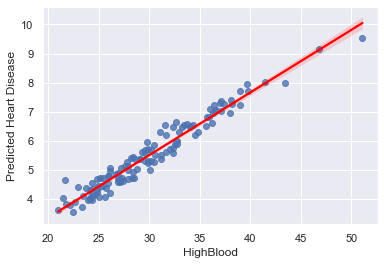

In [139]:
sns.regplot(x='HighBlood', y='Predicted Heart Disease',data = df, line_kws={"color": "red"})

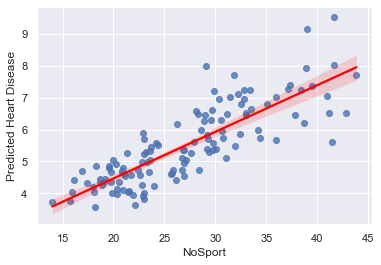

In [140]:
sns.regplot(x='NoSport', y='Predicted Heart Disease',data = df, line_kws={"color": "red"})

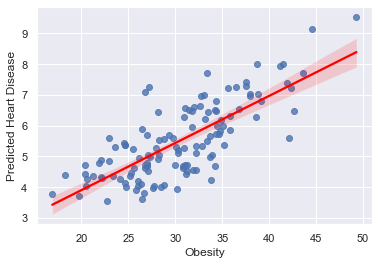

In [141]:
sns.regplot(x='Obesity', y='Predicted Heart Disease',data = df, line_kws={"color": "red"})

In [142]:
df['Predicted  Heart Disease'] = predicted
df = df['Predicted  Heart Disease'] 
df = pd.DataFrame(df, index = df.index) 
df_joined = df.join(dataFrame)

df_joined

,Predicted Heart Disease,CityName,StateAbbr,StateDesc,Population,Asthma,COPD,Cigarete,Mental14,HighBlood,SleepL7,HeartDissease,Obesity,diabete,NoSport,Alchol,kidneyDis
90,4.422125,Ontario,CA,California,327819,8.821923,4.812080,15.118612,14.218559,25.272866,39.137124,4.300631,31.157268,10.430873,26.102004,18.869158,2.817605
254,4.012733,Olathe,KS,Kansas,251744,8.701950,4.488814,14.466386,10.261003,24.136677,27.579168,3.865378,28.483364,7.192023,23.046523,21.153167,2.083072
283,9.147183,Detroit,MI,Michigan,1427494,14.309682,10.683485,28.985116,18.870271,46.826575,49.844963,8.872514,44.536030,18.282348,39.005748,13.419835,4.802950
445,4.723661,Pearland,TX,Texas,182504,7.796998,3.858710,13.481221,10.698113,28.263847,32.319527,3.796749,30.006640,8.576027,26.775707,18.796213,2.198599
461,3.999537,Sandy,UT,Utah,174866,9.205426,4.072638,9.900876,11.114193,24.170959,29.097066,4.119664,24.786549,6.867022,19.866139,15.415083,2.399808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,5.113899,Irving,TX,Texas,432577,8.440722,4.946600,16.713576,13.383510,27.921182,33.745600,4.465715,30.269623,9.871674,31.009345,18.444676,2.533726
49,5.693600,El Cajon,CA,California,198956,9.923978,7.015732,17.976396,15.259752,30.216545,35.359669,5.700938,26.958180,10.103961,22.968705,19.673518,3.274178
134,4.255795,Tustin,CA,California,151005,8.015455,4.003775,11.965162,11.522903,24.146781,33.037241,3.797140,20.546537,8.304340,18.880834,19.813974,2.480463
365,7.943102,Cleveland,OH,Ohio,793629,11.863652,10.844878,28.601168,18.406523,39.709162,42.625730,8.620047,41.171986,17.047964,38.913269,16.705458,4.229517


For the prediction of diabetes disease, we used Gradient Regression whose R^2 score is equal to 0.83. The rates of occurrence of diabetes disease highly depend on the increase of occurring mental illnesses, obesity, smoking cigarette, lack of exercise, and usage of alcohol. You can see the regression plots for 5 independent variable and dependent variable which is prediction value.
When we look at the regression plot, we can see that diabetes disease is mostly dependent lack of exercise than other factors.

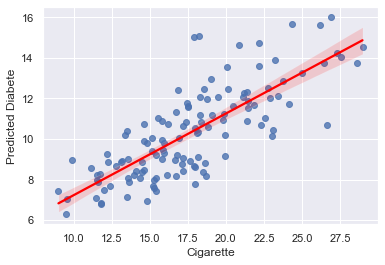

In [143]:
X = dataFrame[['Alchol','Cigarete','Mental14','NoSport','Obesity']] # predictor
y = dataFrame[['diabete']]                                                # predictand
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
 
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predicted = linear_regression.predict(X_test)[:,0]
df = pd.DataFrame({'Alchol': X_test['Alchol'], 'Cigarette': X_test['Cigarete'],
                   'Mental Ilnesses': X_test['Mental14'], 'NoSport': X_test['NoSport'], 
                   'Predicted Diabete': predicted, 'Obesity': X_test['Obesity']})

sns.regplot(x='Cigarette', y='Predicted Diabete',data = df, line_kws={"color": "red"})

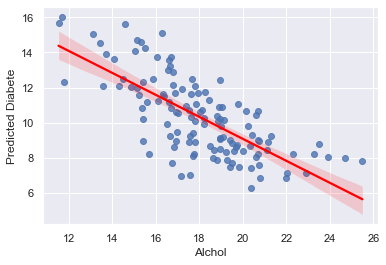

In [144]:
sns.regplot(x='Alchol', y='Predicted Diabete',data = df, line_kws={"color": "red"})

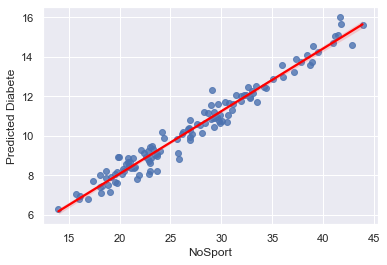

In [145]:
sns.regplot(x='NoSport', y='Predicted Diabete',data = df, line_kws={"color": "red"})

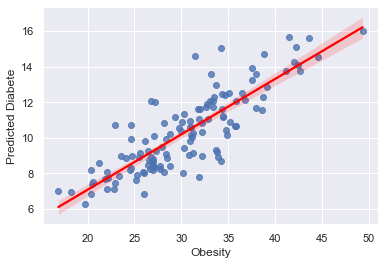

In [146]:
sns.regplot(x='Obesity', y='Predicted Diabete',data = df, line_kws={"color": "red"})

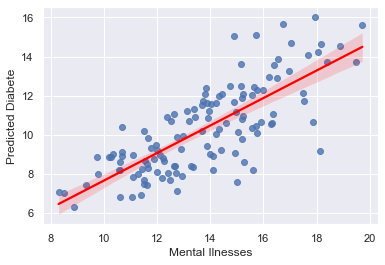

In [147]:
sns.regplot(x='Mental Ilnesses', y='Predicted Diabete',data = df, line_kws={"color": "red"})

In [148]:
df['Predicted Diabete'] = predicted
df = df['Predicted Diabete'] 
df = pd.DataFrame(df, index = df.index) 
df_joined = df.join(dataFrame)

df_joined

,Predicted Diabete,CityName,StateAbbr,StateDesc,Population,Asthma,COPD,Cigarete,Mental14,HighBlood,SleepL7,HeartDissease,Obesity,diabete,NoSport,Alchol,kidneyDis
90,10.064912,Ontario,CA,California,327819,8.821923,4.812080,15.118612,14.218559,25.272866,39.137124,4.300631,31.157268,10.430873,26.102004,18.869158,2.817605
254,8.875982,Olathe,KS,Kansas,251744,8.701950,4.488814,14.466386,10.261003,24.136677,27.579168,3.865378,28.483364,7.192023,23.046523,21.153167,2.083072
283,14.553907,Detroit,MI,Michigan,1427494,14.309682,10.683485,28.985116,18.870271,46.826575,49.844963,8.872514,44.536030,18.282348,39.005748,13.419835,4.802950
445,10.391296,Pearland,TX,Texas,182504,7.796998,3.858710,13.481221,10.698113,28.263847,32.319527,3.796749,30.006640,8.576027,26.775707,18.796213,2.198599
461,8.944114,Sandy,UT,Utah,174866,9.205426,4.072638,9.900876,11.114193,24.170959,29.097066,4.119664,24.786549,6.867022,19.866139,15.415083,2.399808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,11.309465,Irving,TX,Texas,432577,8.440722,4.946600,16.713576,13.383510,27.921182,33.745600,4.465715,30.269623,9.871674,31.009345,18.444676,2.533726
49,8.629852,El Cajon,CA,California,198956,9.923978,7.015732,17.976396,15.259752,30.216545,35.359669,5.700938,26.958180,10.103961,22.968705,19.673518,3.274178
134,7.492849,Tustin,CA,California,151005,8.015455,4.003775,11.965162,11.522903,24.146781,33.037241,3.797140,20.546537,8.304340,18.880834,19.813974,2.480463
365,13.738751,Cleveland,OH,Ohio,793629,11.863652,10.844878,28.601168,18.406523,39.709162,42.625730,8.620047,41.171986,17.047964,38.913269,16.705458,4.229517


For the prediction of kidney disease, we used SVR Regression whose R^2 score is equal to 0.87. The rates of occurrence of kidney disease highly depend on the increase of occurring mental illnesses, diabetes disease, smoking cigarettes, lack of exercise, and usage of alcohol. You can see the regression plots for 5 independent variable and dependent variable which is prediction value. When we look at the regression plot, we can see that kidney disease is mostly dependent on occurring diabetes disease than other factors.

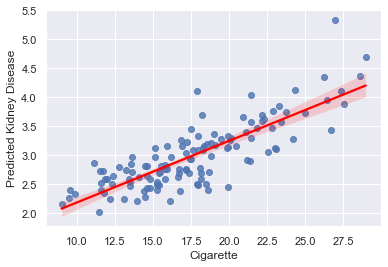

In [149]:
X = dataFrame[['Alchol','Cigarete','Mental14','NoSport','diabete']] # predictor
y = dataFrame[['kidneyDis']]                                                # predictand
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
 
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predicted = linear_regression.predict(X_test)[:,0]
df = pd.DataFrame({'Alchol': X_test['Alchol'], 'Cigarette': X_test['Cigarete'],
                   'Mental Ilnesses': X_test['Mental14'], 'NoSport': X_test['NoSport'], 
                   'Predicted Kidney Disease': predicted, 'diabete': X_test['diabete']})

sns.regplot(x='Cigarette', y='Predicted Kidney Disease',data = df, line_kws={"color": "red"})

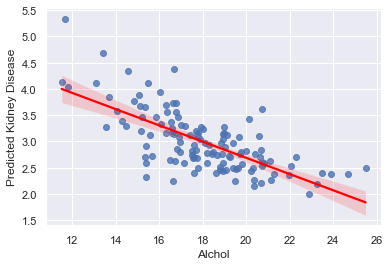

In [150]:
sns.regplot(x='Alchol', y='Predicted Kidney Disease',data = df, line_kws={"color": "red"})

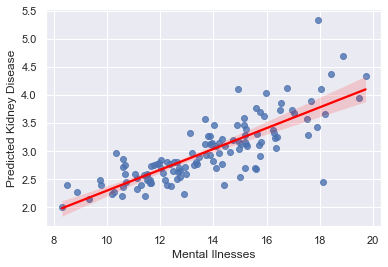

In [151]:
sns.regplot(x='Mental Ilnesses', y='Predicted Kidney Disease',data = df, line_kws={"color": "red"})

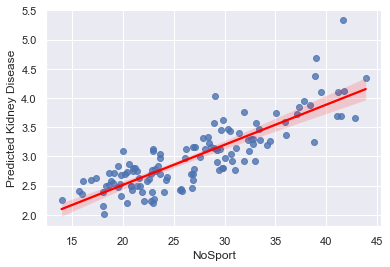

In [152]:
sns.regplot(x='NoSport', y='Predicted Kidney Disease',data = df, line_kws={"color": "red"})

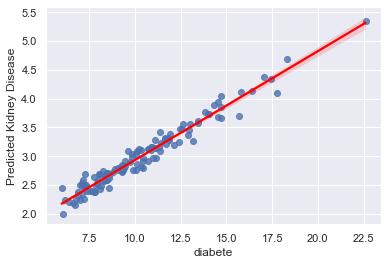

In [153]:
sns.regplot(x='diabete', y='Predicted Kidney Disease',data = df, line_kws={"color": "red"})

In [154]:
df['Predicted Kidney Disease'] = predicted
df = df['Predicted Kidney Disease'] 
df = pd.DataFrame(df, index = df.index) 
df_joined = df.join(dataFrame)

df_joined

,Predicted Kidney Disease,CityName,StateAbbr,StateDesc,Population,Asthma,COPD,Cigarete,Mental14,HighBlood,SleepL7,HeartDissease,Obesity,diabete,NoSport,Alchol,kidneyDis
90,2.966401,Ontario,CA,California,327819,8.821923,4.812080,15.118612,14.218559,25.272866,39.137124,4.300631,31.157268,10.430873,26.102004,18.869158,2.817605
254,2.265605,Olathe,KS,Kansas,251744,8.701950,4.488814,14.466386,10.261003,24.136677,27.579168,3.865378,28.483364,7.192023,23.046523,21.153167,2.083072
283,4.689296,Detroit,MI,Michigan,1427494,14.309682,10.683485,28.985116,18.870271,46.826575,49.844963,8.872514,44.536030,18.282348,39.005748,13.419835,4.802950
445,2.455294,Pearland,TX,Texas,182504,7.796998,3.858710,13.481221,10.698113,28.263847,32.319527,3.796749,30.006640,8.576027,26.775707,18.796213,2.198599
461,2.323742,Sandy,UT,Utah,174866,9.205426,4.072638,9.900876,11.114193,24.170959,29.097066,4.119664,24.786549,6.867022,19.866139,15.415083,2.399808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2.763836,Irving,TX,Texas,432577,8.440722,4.946600,16.713576,13.383510,27.921182,33.745600,4.465715,30.269623,9.871674,31.009345,18.444676,2.533726
49,3.086224,El Cajon,CA,California,198956,9.923978,7.015732,17.976396,15.259752,30.216545,35.359669,5.700938,26.958180,10.103961,22.968705,19.673518,3.274178
134,2.576569,Tustin,CA,California,151005,8.015455,4.003775,11.965162,11.522903,24.146781,33.037241,3.797140,20.546537,8.304340,18.880834,19.813974,2.480463
365,4.371680,Cleveland,OH,Ohio,793629,11.863652,10.844878,28.601168,18.406523,39.709162,42.625730,8.620047,41.171986,17.047964,38.913269,16.705458,4.229517


## References<a class="anchor" id="references"></a>

- A folium library to indicate clusters on the US map:  https://github.com/python-visualization/folium/
- Disease and behavior datasets for 500 cities of US:
https://chronicdata.cdc.gov/browse?q=500&sortBy=relevance
- Air pollution dataset of the US: 
https://aqs.epa.gov/aqsweb/airdata/download_files.html
- json files for us map and csv files are added to our GitHub repository:  https://github.com/oktayugurlu/BBM469-Sources-For-Capstone-Project
